## Titanic Kaggle Competition

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

### Data Descirption

* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
* pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Importing the neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing the Train CSV file

In [43]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df = df.drop("Cabin", axis=1)

In [48]:
df = df.drop("Ticket", axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [82]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.013166
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.164681
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.032565
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068900
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.040449
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.226311
Embarked,-0.013166,0.169718,-0.164681,0.032565,-0.068900,-0.040449,0.226311,1.000000


In [49]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [60]:
df["Title"].value_counts()

Mr      519
Miss    182
Mrs     131
Mas      40
Dr        7
Rev       6
Col       6
Name: Title, dtype: int64

In [52]:
df[df["Title"]=="Mlle"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,69.3000,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,49.5042,C,Mlle


In [53]:
rep = {"Master": "Mas","Major":"Col","Mlle":"Mrs","Capt":"Col","Don":"Mr","Lady":"Mrs","Jonkheer":"Mr","Mme":"Mrs","Lady":"Mrs","Sir":"Col","Countess":"Mrs","Ms":"Mrs"}

In [57]:
df["Title"]=df["Title"].replace("High","Mrs")

In [58]:
df["Title"] = df["Title"].replace(rep)

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


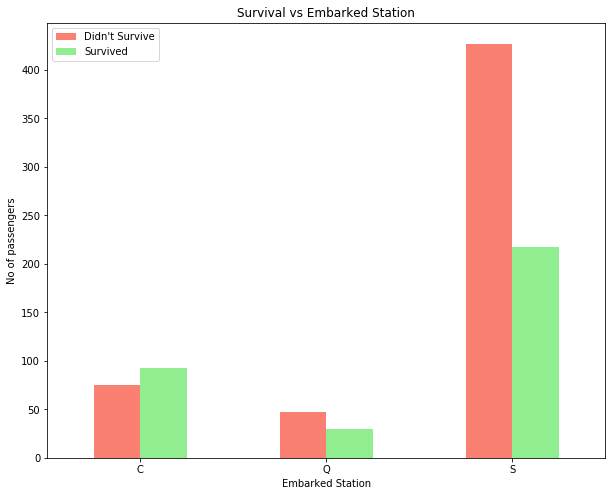

In [79]:
pd.crosstab(df["Survived"],df["Embarked"]).T.plot(kind="bar", figsize=(10,8),color=["salmon","LightGreen"],rot=0)
plt.title("Survival vs Embarked Station")
plt.legend(["Didn't Survive","Survived"])
plt.xlabel("Embarked Station")
plt.ylabel("No of passengers");

In [80]:
df["Embarked"] = df["Embarked"].replace({"S":1,"Q":2,"C":3})

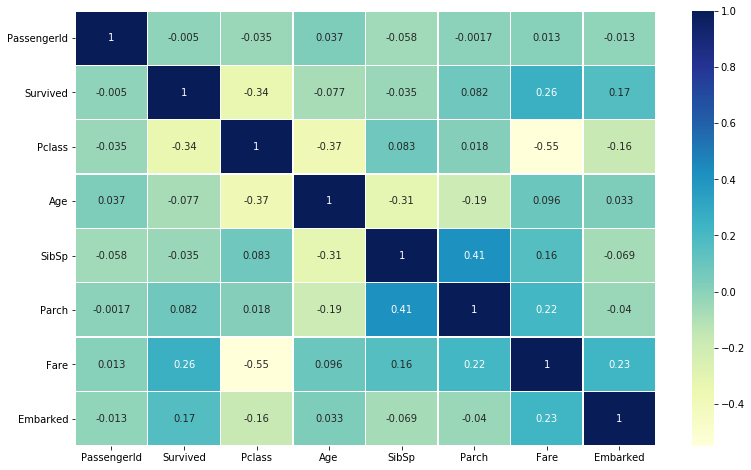

In [83]:
fig = plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidth = 0.5)

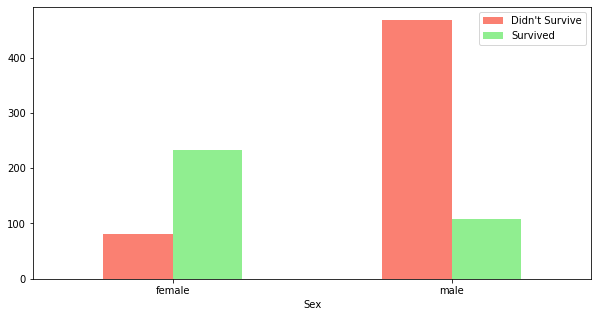

In [85]:
pd.crosstab(df.Survived, df.Sex).T.plot(kind="bar", figsize=(10,5), color=["Salmon", "LightGreen"],rot=0)
plt.legend(["Didn't Survive", "Survived"])

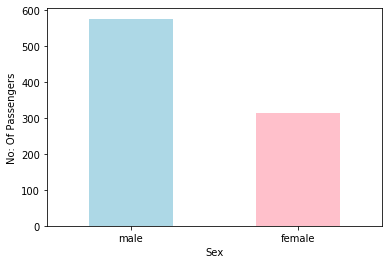

In [86]:
df.Sex.value_counts().plot(kind="bar", color=["LightBlue", "Pink"],rot=0)
plt.xlabel("Sex")
plt.ylabel("No: Of Passengers");


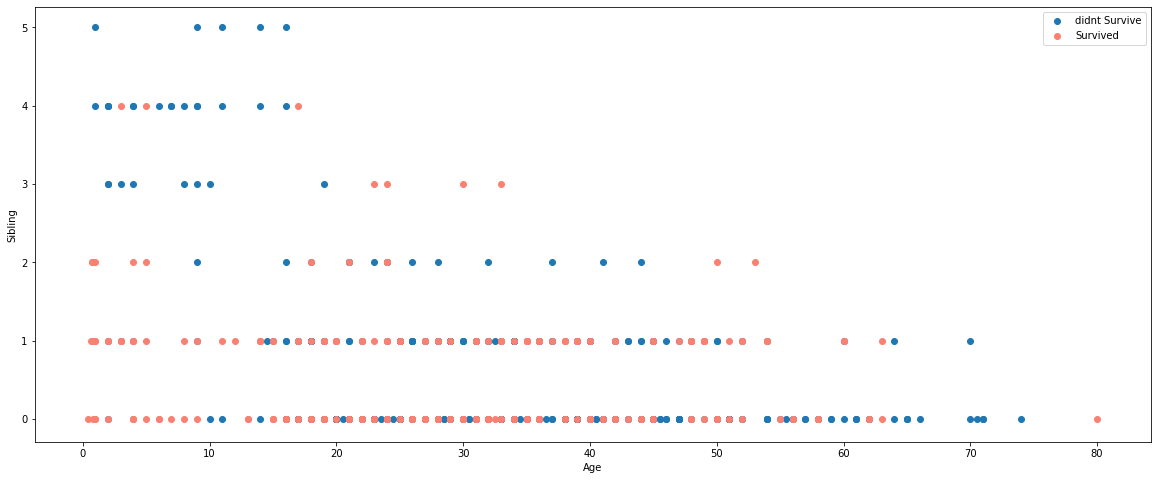

In [87]:
fig = plt.figure(figsize=(20,8))
plt.scatter(df.Age[df.Survived==0], df.SibSp[df.Survived==0], label="didnt Survive")
plt.scatter(df.Age[df.Survived==1], df.SibSp[df.Survived==1], label="Survived", color="salmon")
plt.xlabel("Age")
plt.ylabel("Sibling")
plt.legend()

In [88]:
df["Age"].fillna(df["Age"].mean(),inplace=True)


In [89]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [19]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [97]:
df['Embarked'].replace("S",1,inplace=True)

In [98]:
df = df.drop("PassengerId",axis=1)

KeyError: "['PassengerId'] not found in axis"

In [99]:
df["Sex"].replace("female",1, inplace=True)
df["Sex"].replace("male",0, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,3.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1.0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1.0,Mr


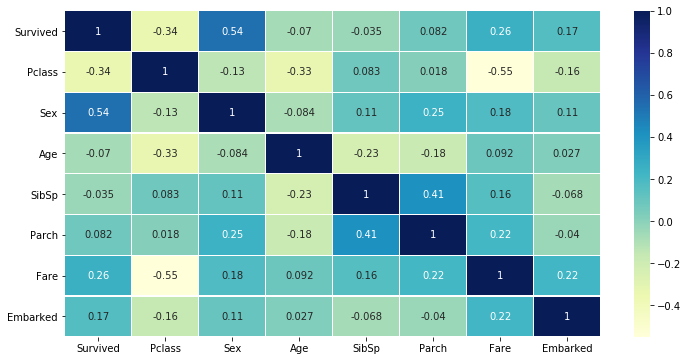

In [100]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidth=0.2)

In [110]:
df1 = df.copy()
df1.drop("Name",axis=1,inplace=True)

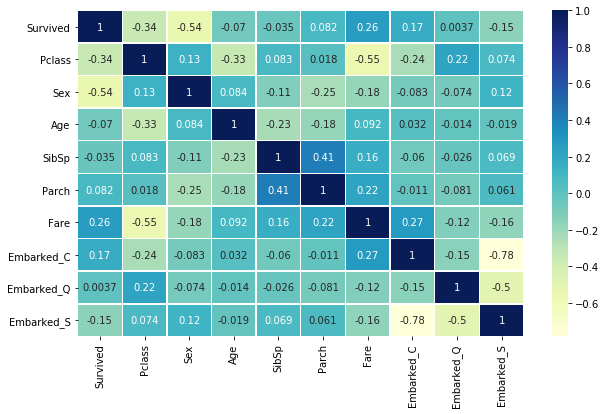

In [46]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), cmap="YlGnBu",annot=True,linewidth=0.4)

In [113]:
df1 = pd.get_dummies(df1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Mas,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,0,3,0,22.0,1,0,7.2500,1.0,0,0,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,3.0,0,0,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,1.0,0,0,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,1.0,0,0,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,1.0,0,0,0,0,1,0,0


In [147]:
df1.shape

(891, 15)

## Splitting Data into test and train

In [114]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

In [115]:
x= df1.drop("Survived", axis=1)
y = df1["Survived"]
x.head(),y.head()

(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title_Col  Title_Dr  \
 0       3    0  22.0      1      0   7.2500       1.0          0         0   
 1       1    1  38.0      1      0  71.2833       3.0          0         0   
 2       3    1  26.0      0      0   7.9250       1.0          0         0   
 3       1    1  35.0      1      0  53.1000       1.0          0         0   
 4       3    0  35.0      0      0   8.0500       1.0          0         0   
 
    Title_Mas  Title_Miss  Title_Mr  Title_Mrs  Title_Rev  
 0          0           0         1          0          0  
 1          0           0         0          1          0  
 2          0           1         0          0          0  
 3          0           0         0          1          0  
 4          0           0         1          0          0  ,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression

In [162]:
model1 = LogisticRegression(max_iter=500)
model1.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
model1.score(X_test, Y_test)

0.8356741573033708


0.8268156424581006

In [163]:
model1.coef_

array([[-0.85004628,  1.31458474, -0.02292382, -0.4706533 , -0.35503591,
         0.00432618,  0.23914959, -0.30463227, -0.40530328,  1.59002356,
         0.10041032, -1.29093085,  1.21417443, -0.91157531]])

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
print(model2.score(X_train,Y_train))
model2.score(X_test, Y_test)

0.7963483146067416


0.7206703910614525

In [166]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)
print(model3.score(X_train, Y_train))
model3.score(X_test, Y_test)

0.9831460674157303


0.8212290502793296

In [167]:
from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression(solver="liblinear",C=3,max_iter=500)
model4.fit(X_train, Y_train)
model4.score(X_test, Y_test)

0.8212290502793296

In [132]:
data = pd.read_csv("test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [133]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [134]:
data["Title"] = data["Name"].str.extract(r' ([A-Za-z]+)\.')
data.Title.value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [135]:
data.replace({"Dona":"Mrs","Ms":"Mrs"},inplace=True)

In [136]:
data.Title.value_counts()

Mr        240
Miss       78
Mrs        74
Master     21
Col         2
Rev         2
Dr          1
Name: Title, dtype: int64

In [137]:
data.drop(["Cabin","Ticket"], axis=1,inplace=True)

In [138]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Mrs
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mr


In [141]:
data["Embarked"] = data["Embarked"].replace({"S":1,"Q":2,"C":3})

In [139]:
data["Age"].fillna(df["Age"].mean(),inplace=True)

In [142]:
data.drop("PassengerId",axis=1,inplace=True)
data = pd.get_dummies(data)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,0,34.5,0,0,7.8292,2,0,0,0,0,1,0,0
1,3,1,47.0,1,0,7.0000,1,0,0,0,0,0,1,0
2,2,0,62.0,0,0,9.6875,2,0,0,0,0,1,0,0
3,3,0,27.0,0,0,8.6625,1,0,0,0,0,1,0,0
4,3,1,22.0,1,1,12.2875,1,0,0,0,0,0,1,0


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["embark"] = encoder.fit_transform(data["Embarked"])
data.drop("Embarked",axis=1,inplace=True)
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,embark
0,892,3,1,34.500000,0,0,7.8292,1
1,893,3,0,47.000000,1,0,7.0000,2
2,894,2,1,62.000000,0,0,9.6875,1
3,895,3,1,27.000000,0,0,8.6625,2
4,896,3,0,22.000000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,29.653446,0,0,8.0500,2
414,1306,1,0,39.000000,0,0,108.9000,0
415,1307,3,1,38.500000,0,0,7.2500,2
416,1308,3,1,29.653446,0,0,8.0500,2


In [145]:
data["Fare"].fillna(df1["Fare"].median(),inplace=True)
data.isna().sum()
data.shape

(418, 14)

In [157]:
arr = model2.predict(data)
data_random["Survived"]= arr
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,0,34.500000,0,0,7.8292,2,0,0,0,0,1,0,0
1,3,1,47.000000,1,0,7.0000,1,0,0,0,0,0,1,0
2,2,0,62.000000,0,0,9.6875,2,0,0,0,0,1,0,0
3,3,0,27.000000,0,0,8.6625,1,0,0,0,0,1,0,0
4,3,1,22.000000,1,1,12.2875,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0
414,1,1,39.000000,0,0,108.9000,3,0,0,0,0,0,1,0
415,3,0,38.500000,0,0,7.2500,1,0,0,0,0,1,0,0
416,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0


In [158]:
data.to_csv("predict_KNN.csv")

In [72]:
df.loc[df["PassengerId"]==69]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embark
68,69,1,3,0,17.0,4,2,7.925,2


In [154]:
data.drop("Survived",axis=1,inplace=True)

In [160]:
data_random = data.copy()

In [161]:
data_random.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,0,34.5,0,0,7.8292,2,0,0,0,0,1,0,0
1,3,1,47.0,1,0,7.0000,1,0,0,0,0,0,1,0
2,2,0,62.0,0,0,9.6875,2,0,0,0,0,1,0,0
3,3,0,27.0,0,0,8.6625,1,0,0,0,0,1,0,0
4,3,1,22.0,1,1,12.2875,1,0,0,0,0,0,1,0


In [168]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,0,34.500000,0,0,7.8292,2,0,0,0,0,1,0,0
1,3,1,47.000000,1,0,7.0000,1,0,0,0,0,0,1,0
2,2,0,62.000000,0,0,9.6875,2,0,0,0,0,1,0,0
3,3,0,27.000000,0,0,8.6625,1,0,0,0,0,1,0,0
4,3,1,22.000000,1,1,12.2875,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0
414,1,1,39.000000,0,0,108.9000,3,0,0,0,0,0,1,0
415,3,0,38.500000,0,0,7.2500,1,0,0,0,0,1,0,0
416,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0


In [182]:
data_ran = data.copy()
data_ran

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,0,34.500000,0,0,7.8292,2,0,0,0,0,1,0,0
1,3,1,47.000000,1,0,7.0000,1,0,0,0,0,0,1,0
2,2,0,62.000000,0,0,9.6875,2,0,0,0,0,1,0,0
3,3,0,27.000000,0,0,8.6625,1,0,0,0,0,1,0,0
4,3,1,22.000000,1,1,12.2875,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0
414,1,1,39.000000,0,0,108.9000,3,0,0,0,0,0,1,0
415,3,0,38.500000,0,0,7.2500,1,0,0,0,0,1,0,0
416,3,0,29.699118,0,0,8.0500,1,0,0,0,0,1,0,0


In [183]:
arr = model2.predict(data_ran)
data_ran["Survived"]= arr
data_ran.to_csv("predict_ran.csv")